# Trending YouTube Video Analysis

## Clean the data

In [1]:
import pandas as pd
import numpy as np

# Read the file using pandas
file = '../files/USvideos.csv'
df = pd.read_csv(file)

# Check the data
# df.head()

# Check for null values - Only in description
# df.isna().sum()

In [2]:
# Load category id json file
json = '../files/US_category_id.json'

df_json = pd.read_json(json)

# Extract item name from items and save it as a new columnm, items_name
df_json['items_name'] = df_json['items'].apply(lambda x: x['snippet']['title'])

# Extract category_id from items and save it as a new column, category_id
df_json['category_id'] = df_json['items'].apply(lambda x: x['id'])

# Save items as a dataframe
items = df_json.iloc[:,-2:]

# Change data type of category_id to integer
items['category_id'] = items['category_id'].astype(int)

# Merge on category_id and re-save to df
df = df.merge(items)

In [3]:
import datetime as d

# Add '20' in the front to later be changed to panda's datetime object
df['trending_date'] = df['trending_date'].apply(lambda x: '20' + x)

# Change to panda's datetime object
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y.%d.%m')

# Change to datetime object first then...
df['publish_time'] = df['publish_time'].apply(lambda x: d.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ")).dt.date

# change to pandas datetime object
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Replace " with empty space and split on |
df['tags'] = df['tags'].str.replace('"', '').str.split('|')

In [4]:
# Ratio of likes to dislikes
df['likes_percentage'] = df['likes'] / (df['dislikes'] + df['likes'])

In [5]:
df['duration_to_trend'] = df['trending_date'] - df['publish_time']

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,items_name,likes_percentage,duration_to_trend
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,[SHANtell martin],748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.950970,1 days
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21,"[cute, cats, thai, eggs]",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,0.931086,207 days
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11,"[shawn johnson, andrew east, shawn east, shawn...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,0.715250,3 days
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11,"[itsgrace, funny, comedy, vlog, grace, helbig,...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,0.970939,3 days
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11,[wearing online dollar store makeup for a week...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,0.990475,3 days


In [7]:
df['channel_title'].value_counts()[0:25].plot(kind='bar')

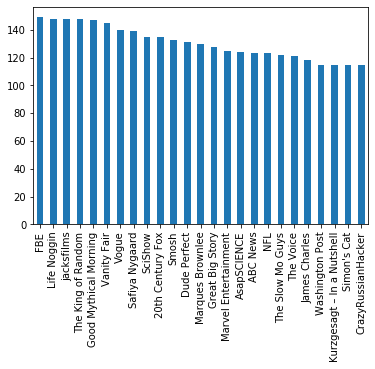

In [8]:
df['channel_title'].value_counts()[25:50].plot(kind='bar')

In [9]:
df[df['channel_title'] == 'PewDiePie']
# df[(df['channel_title'] == 'ESPN') & (df['views'] >= 1000000)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,items_name,likes_percentage,duration_to_trend
11148,0l35jAGQPOI,2018-05-08,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],4523214,379796,4576,46295,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.988095,2 days
11209,0l35jAGQPOI,2018-05-09,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],5146567,415266,5337,48943,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.987311,3 days
11268,0l35jAGQPOI,2018-05-10,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],5590186,439331,5827,50706,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986910,4 days
11329,0l35jAGQPOI,2018-05-11,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],5823986,450950,6064,51503,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986731,5 days
11389,0l35jAGQPOI,2018-05-12,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],5976728,458609,6205,49176,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986651,6 days
11448,0l35jAGQPOI,2018-05-13,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],6130597,465867,6321,49615,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986613,7 days
11486,0l35jAGQPOI,2018-05-14,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],6231038,471010,6482,50076,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986425,8 days
11641,0l35jAGQPOI,2018-05-16,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],6400136,476534,6632,50393,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986274,10 days
11700,0l35jAGQPOI,2018-05-17,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],6447068,478527,6669,50545,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986255,11 days
11758,0l35jAGQPOI,2018-05-18,Are we ready to get married?,PewDiePie,24,2018-05-06,[SATIRE],6482811,480065,6698,50670,https://i.ytimg.com/vi/0l35jAGQPOI/default.jpg,False,False,False,SUBMIT MEMES: https://www.reddit.com/r/Pewdiep...,Entertainment,0.986240,12 days


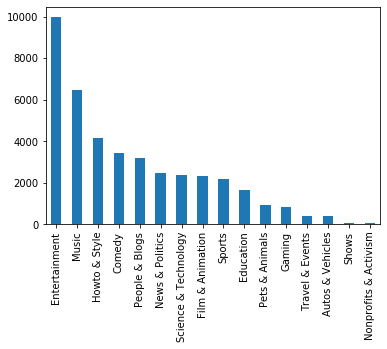

In [11]:
df['items_name'].value_counts().plot(kind='bar')

# Average views of all unique videos of channel_title

In [15]:
# Dataframe of unique videos when they first became trendy
df_unique = df.drop_duplicates(subset='video_id', keep='first')

## Plot top 50 channels with the most videos that get into the trendy page

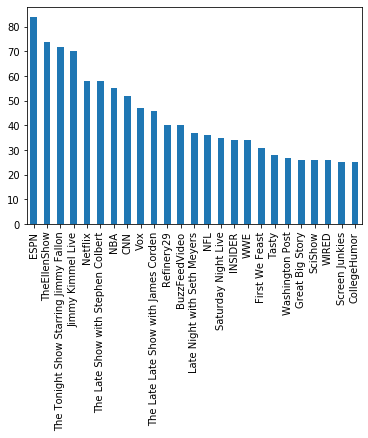

In [16]:
df_unique['channel_title'].value_counts()[0:25].plot(kind='bar')

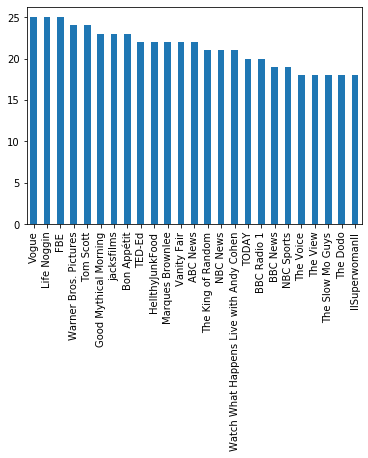

In [17]:
df_unique['channel_title'].value_counts()[25:50].plot(kind='bar')

## Plot Averages of views of each creator's videos

In [27]:
df_avg = pd.pivot_table(df_unique, index=['channel_title'], values=['views'], aggfunc='mean').sort_values(by=['views'], ascending=False)

In [34]:
df_avg = df_avg.reset_index()

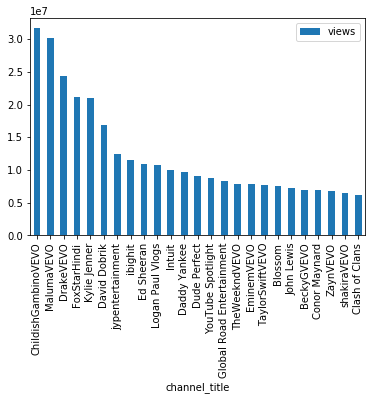

In [42]:
df_avg[0:25].plot(kind='bar', x='channel_title', y='views')

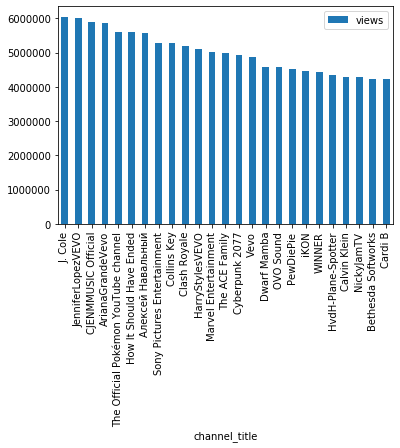

In [43]:
df_avg[25:50].plot(kind='bar', x='channel_title', y='views')

In [48]:
df_count = pd.pivot_table(df_unique, index=['channel_title'], values=['video_id'], aggfunc='count').sort_values(by=['video_id'], ascending=False).reset_index()

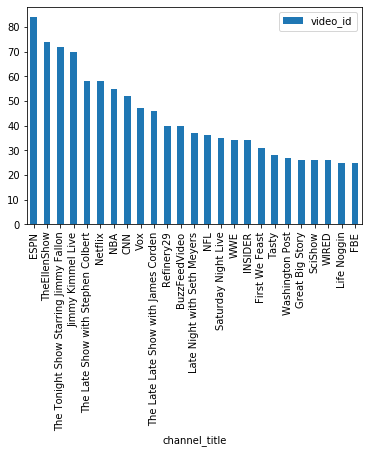

In [49]:
df_count[0:25].plot(kind='bar', x='channel_title', y='video_id')